In [ ]:
import sys
from matplotlib import pyplot
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout

170508288/170498071 [==============================] - 2s 0us/step


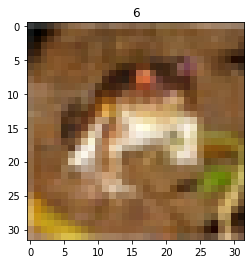

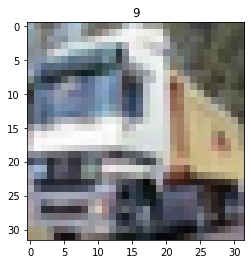

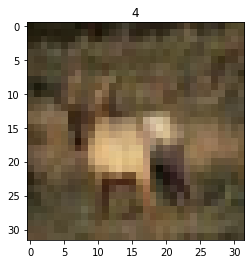

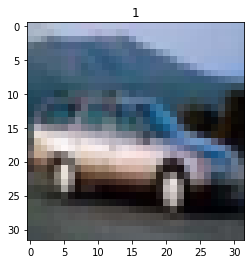

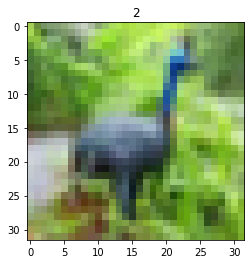

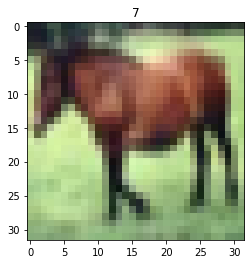

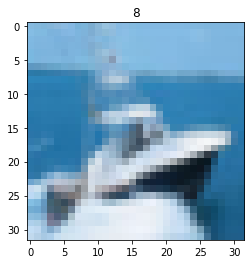

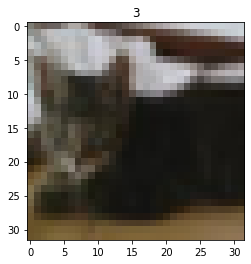

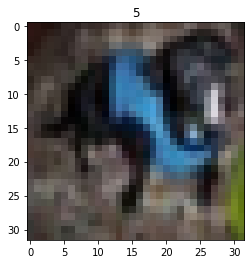

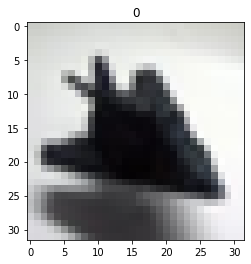

In [ ]:
# load train and test dataset


def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = cifar10.load_data()
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY


trainX, trainy, testX, testy = load_dataset()
train_dataX = trainX[0 : round(trainX.shape[0]  * 0.8)] 
train_dataY = trainy[0 : round(trainX.shape[0]  * 0.8)]
eval_dataX = trainX[round(trainX.shape[0] * 0.8):-1]
eval_dataY = trainy[round(trainX.shape[0] * 0.8):-1]


kinds = []
indexes = []
i = 0
while  len(kinds) < 10:
    current_cat = np.where(train_dataY[i] == 1)[0][0]
    if kinds.count(current_cat) == 0:
        kinds.append(current_cat)
        indexes.append(i)
    i = i+1

for i in range(len(indexes)):
    pyplot.imshow(train_dataX[indexes[i]])
    pyplot.title(kinds[i])
    pyplot.show()


Epoch 1/20
625/625 [==============================] - 24s 19ms/step - loss: 1.9406 - accuracy: 0.2950 - val_loss: 1.6823 - val_accuracy: 0.4104
Epoch 2/20
625/625 [==============================] - 9s 15ms/step - loss: 1.6449 - accuracy: 0.4126 - val_loss: 1.5237 - val_accuracy: 0.4647
Epoch 3/20
625/625 [==============================] - 10s 15ms/step - loss: 1.5178 - accuracy: 0.4559 - val_loss: 1.4147 - val_accuracy: 0.5038
Epoch 4/20
625/625 [==============================] - 10s 16ms/step - loss: 1.4321 - accuracy: 0.4854 - val_loss: 1.3433 - val_accuracy: 0.5222
Epoch 5/20
625/625 [==============================] - 10s 16ms/step - loss: 1.3559 - accuracy: 0.5138 - val_loss: 1.2720 - val_accuracy: 0.5571
Epoch 6/20
625/625 [==============================] - 10s 15ms/step - loss: 1.2896 - accuracy: 0.5399 - val_loss: 1.2116 - val_accuracy: 0.5761
Epoch 7/20
625/625 [==============================] - 9s 15ms/step - loss: 1.2332 - accuracy: 0.5598 - val_loss: 1.1770 - val_accuracy: 0

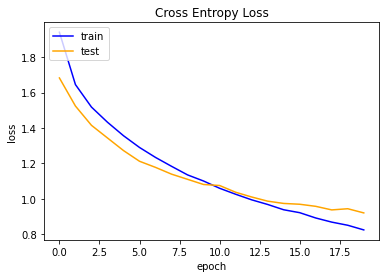

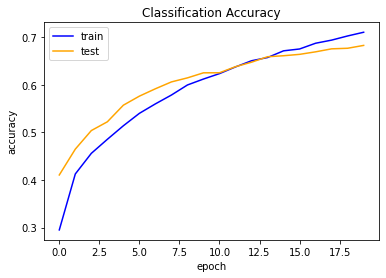

Epoch 1/20
625/625 [==============================] - 11s 17ms/step - loss: 1.9902 - accuracy: 0.2725 - val_loss: 1.6981 - val_accuracy: 0.4132
Epoch 2/20
625/625 [==============================] - 10s 15ms/step - loss: 1.6669 - accuracy: 0.3986 - val_loss: 1.4997 - val_accuracy: 0.4716
Epoch 3/20
625/625 [==============================] - 10s 16ms/step - loss: 1.5155 - accuracy: 0.4501 - val_loss: 1.3886 - val_accuracy: 0.5125
Epoch 4/20
625/625 [==============================] - 10s 16ms/step - loss: 1.4214 - accuracy: 0.4888 - val_loss: 1.3206 - val_accuracy: 0.5375
Epoch 5/20
625/625 [==============================] - 10s 15ms/step - loss: 1.3507 - accuracy: 0.5154 - val_loss: 1.2620 - val_accuracy: 0.5506
Epoch 6/20
625/625 [==============================] - 10s 16ms/step - loss: 1.2913 - accuracy: 0.5379 - val_loss: 1.2115 - val_accuracy: 0.5793
Epoch 7/20
625/625 [==============================] - 9s 15ms/step - loss: 1.2376 - accuracy: 0.5584 - val_loss: 1.1820 - val_accuracy: 

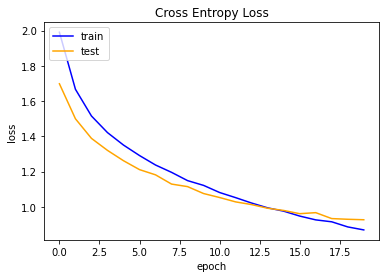

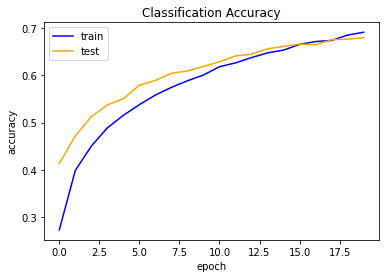

In [ ]:
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm


def define_model_baseline1():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(learning_rate=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

def define_model_baseline2():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

def define_model_baseline3():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

def define_model_baseline1_tanh():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='tanh', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(Conv2D(32, (3, 3), activation='tanh', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='tanh', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(learning_rate=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

def define_model_baseline1_adam():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = Adam(learning_rate=0.001)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

def define_model_baseline1_dropout(dropout_percent):
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(dropout_percent))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dropout(dropout_percent))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(learning_rate=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model


def summarize_diagnostics(history):
	# plot loss
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	pyplot.ylabel('loss')
	pyplot.xlabel('epoch')
	pyplot.legend(['train', 'test'], loc='upper left')
	pyplot.show()
	# plot accuracy
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	pyplot.title('Classification Accuracy')
	pyplot.ylabel('accuracy')
	pyplot.xlabel('epoch')
	pyplot.legend(['train', 'test'], loc='upper left')
	pyplot.show()
   


def run_test_harness():
	trainX, trainy, testX, testy = load_dataset()
	train_dataX = trainX[0 : round(trainX.shape[0]  * 0.8)] 
	train_dataY = trainy[0 : round(trainX.shape[0]  * 0.8)]
	eval_dataX = trainX[round(trainX.shape[0] * 0.8):-1]
	eval_dataY = trainy[round(trainX.shape[0] * 0.8):-1]
	# prepare pixel data
	train_dataX, eval_dataX = prep_pixels(train_dataX, eval_dataX)
	# define model
	drop_out_p =[0.25,0.3]
	for p in drop_out_p:
		model = define_model_baseline1_dropout(p)
			
		# fit model
		history = model.fit(train_dataX, train_dataY, epochs=20, batch_size=64, validation_data=(eval_dataX, eval_dataY), verbose=1)
		# evaluate model
		_, acc = model.evaluate(testX, testy, verbose=1)
		print('> %.3f' % (acc * 100.0))
		# learning curves
		summarize_diagnostics(history)





run_test_harness()
